## Projeto Final

Este experimento exige o uso de um baralho comum. Trata-se de um conjunto de 52 cartas, divididas em quatro naipes (espadas (♠), copas (♥), ouros (♦) e paus (♣)), cada um deles com 13 cartas (às, os números 2 a 10, dama, valete e rei). Aqui, você pode usar cartas físicas ou virtuais, como as encontradas no **random.org** [link](http://www.random.org/playing-cards/).<br/>
Para esta tarefa específica, dê um valor para cada carta: o ás vale 1, as cartas numeradas valem o número contido em cada uma delas e a dama, valete e rei valem 10 cada uma.


**Rubrica para avaliar o projeto->** [Google Drive](https://docs.google.com/document/d/1m8FUvjyvWrywk3W1mScM23lMjA3venct9tzize8hX7Q/edit#)

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

plt.style.use("seaborn-muted")
sns.set_style('darkgrid')

%matplotlib inline

#### 1. Antes de mais nada, crie um histograma representando a frequência relativa do valor de cada carta.

Criei um pequeno dataframe contendo o valor de cada carta, a frequência que a mesma se repete no baralho (frequência absoluta) e a frequência relativa de cada uma.<br/>
Abaixo, um histograma representando as frequências relativas de cada carta no baralho. Considerando que damas, valetes e reis valem 10, este valor se torna o mais frequente.

In [61]:
df = pd.read_excel('../cartas.xlsx')
df

,valor,fa,fr
0,1,4,0.076923
1,2,4,0.076923
2,3,4,0.076923
3,4,4,0.076923
4,5,4,0.076923
5,6,4,0.076923
6,7,4,0.076923
7,8,4,0.076923
8,9,4,0.076923
9,10,16,0.307692


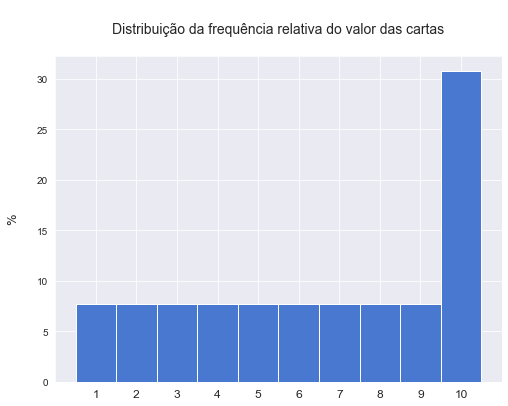

In [130]:
f, ax = plt.subplots(figsize=(8, 6))
plt.bar(df['valor'], df['fr']*100, width=1.)

plt.title('\nDistribuição da frequência relativa do valor das cartas\n', fontsize=14)
plt.xlabel('\n', fontsize=14)
plt.ylabel('%\n', fontsize=13)
plt.xticks(np.arange(1, 11, step=1), size=12)

plt.show()

#### 2. Agora, usaremos as amostras para uma nova distribuição. Para obter uma só amostra, embaralhe as cartas e pegue três delas (você usará cartas do baralho e não as substituirá). Anote as cartas que você tirou e a soma do valor das três. Coloque-as de volta no baralho e repita esse procedimento no mínimo trinta vezes.

Criei um dataframe contendo as amostras aleatórias retiradas do baralho e também a soma de cada amostra. As amostras foram geradas no site **random.org**, assim como orientado.

In [131]:
df_amostras = pd.read_excel('../baralho.xlsx')
df_amostras.head()

,amostra,carta1,carta2,carta3,soma
0,1,4,10,10,24
1,2,10,5,3,18
2,3,10,8,9,27
3,4,7,3,1,11
4,5,10,9,6,25


#### 3. Vamos dar uma olhada na distribuição da soma das cartas. Informe a estatística descritiva das cartas que escolheu. Inclua no mínimo duas medidas de tendência central e duas de variabilidade.

In [336]:
pd.DataFrame(df_amostras['soma'].describe())

,soma
count,30.000000
mean,20.733333
std,5.483098
min,9.000000
25%,17.250000
50%,20.500000
75%,24.750000
max,30.000000


**`3`** - Olhando para as medidas de **soma**, a **mediana: 20.50** está muito próxima da **média: 20.73**, indicando que os valores podem ter uma distribuição normal.<br/>


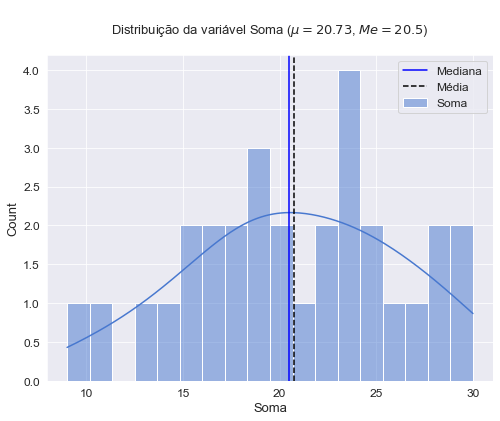

In [142]:
# Gráfico de distribuição representando os valores de Soma
f, ax = plt.subplots(figsize=(8, 6))

mn = df_amostras['soma'].median()
md = df_amostras['soma'].mean()

sns.histplot(ax=ax, data=df_amostras, x='soma', label='Soma', kde=True, bins=18)

plt.axvline(mn, c='#0000FF', ls='-', label='Mediana')
plt.axvline(md, c='#000', ls='--', label='Média')
plt.ticklabel_format(style='plain', axis='x')
plt.title('\nDistribuição da variável Soma ($\mu=20.73$, $Me=20.5$)\n', fontsize=13)
plt.xlabel('Soma', fontsize=13)
plt.ylabel('Count', fontsize=13)

plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

In [451]:
# Desvio padrão
sd = df_amostras['soma'].std()
print('Desvio padrão: {}'.format(sd))

Desvio padrão: 5.483098377385906


In [447]:
# Quartis
q75, q25 = np.percentile(df_amostras, [75,25])
iqr = q75 - q25
print('Instervalo interquartil: {}'.format(iqr))

Instervalo interquartil: 10.75


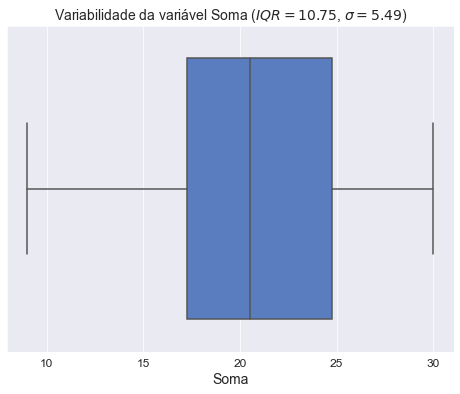

In [453]:
# Boxplot representando a amplitude dos valores
plt.subplots(figsize=(8, 6))

sns.boxplot(data=df_amostras, x='soma')
plt.xlabel('Soma', fontsize=14)
plt.title('Variabilidade da variável Soma ($IQR=10.75$, $\sigma=5.49$)', fontsize=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

A amplitude interquatil indica dispersão dos valores de **soma** em relação a média e mediana. Cerca de 50% desses valores estão dentro do IQR.<br/>
O desvio padrão também mostra que os valores de **soma** estão mais dispersos em relação a média e mediana.

#### 4. Crie um histograma com a soma das cartas retiradas. Compare sua forma com a da distribuição original. Quais são as diferenças entre eles? Você sabe explicar por que eles são diferentes?

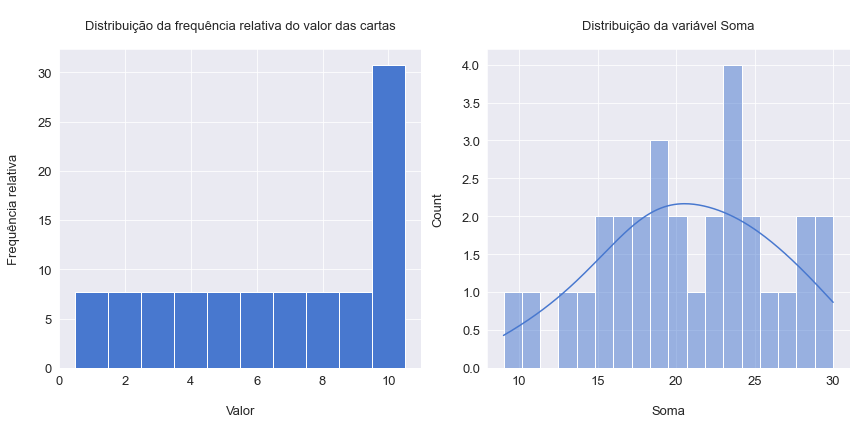

In [140]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(df['valor'], df['fr']*100, width=1.)
plt.title('\nDistribuição da frequência relativa do valor das cartas\n', fontsize=13)
plt.xlabel('\nValor', fontsize=13)
plt.ylabel('Frequência relativa\n', fontsize=13)
plt.xticks(size=13)
plt.yticks(size=13)

plt.subplot(122)
sns.histplot(data=df_amostras, x='soma', label='Soma', kde=True, bins=18)
plt.title('\nDistribuição da variável Soma\n', fontsize=13)
plt.xlabel('\nSoma', fontsize=13)
plt.ylabel('Count\n', fontsize=13)
plt.xticks(size=13)
plt.yticks(size=13)

plt.tight_layout()
plt.show()

Enquanto a distribuição dos valores das cartas mostra uma quase uniformidade, exceto pelo valor 10 que mais se repete, a distribuição de Soma é mais distribuída e com mais dispersão.

#### 5. Faça algumas estimativas dos valores que serão usados nas distribuições seguintes. Dentro de qual intervalo você espera que cerca de 90% dos valores obtidos falhem? Qual é a probabilidade aproximada em que você obterá um valor de 20, no mínimo? Não deixe de explicar como você chegou aos valores.

Baseado numa probalidade de 14,92%, 90% dos valores obtidos falharam no intervalo entre 9 e 15. Também estimo uma probabilidade de 55,17% de obter um valor de 20 ou maior.<br/><br/>
**Explicação:**<br/>
Cheguei a essas conclusões, utilizando os score-z da distribuição de soma. Para os 14,92% prezumi que, sendo os valores abaixo de 15 os que mais ocorrem com menos frequência, calculei utilizando x = 15, subtraindo da média 2,73 e dividindo pelo desvio padrão 5,49. O mesmo foi feito para chegar a probabilidade de obter um valor mínimo de 20, porém, ao encontrar o score-z na tabela, subtrai 1.

$$Z = \tfrac{x-\mu}{\sigma}$$